In [1]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

In [2]:
# History processing

In [3]:
history_folder = "../history/uncoupled/"
#history_filenames = ["history_uncoupled_OG.nc",
#                    "history_uncoupled_MLP.nc",
#                    "history_uncoupled_MLP_400M.nc",
#                    "history_uncoupled_MLP_unbounded.nc"]

history_filenames = ["history_uncoupled_OG.nc", "history_uncoupled_MLP.nc", "history_uncoupled_MLP_weighted.nc"]

histogram_filenames = ["histogram_uncoupled_OG.nc",
                    "histogram_uncoupled_MLP.nc"]
history_file_count = len(history_filenames)
histogram_file_count = len(histogram_filenames)
history_names = [" ".join(filename.split(".")[0].split("_")[1:]).replace("-", " ") for filename in history_filenames]

history_variable_names = ["time",
                          "meanRH",
                  "radavg",
                  "Tpmean_average",
                  "tnumpart"]
history_variable_labels = ["time (s)",
                           "Volume-average relative humidity [%]",
                   "Average radius of all particles [m]",
                   "Average temperature of all particles [K]",
                   "Number of particles [#]"]
history_averaged_variables = ["Tpmean"]


In [4]:
history_files = [Dataset(history_folder + filename, mode='a') for filename in history_filenames]

for v in history_averaged_variables:
    for file in history_files:
        variable = file.variables[v]
        if v + "_average" in file.variables.keys():
            average_variable = file.variables[v + "_average"]
        else:
            average_variable = file.createVariable(v + "_average", np.float64, ('time',))
        average_variable[:] = np.mean(variable, axis=1)

In [5]:

history_variables = [[file.variables[varname][3:] for file in history_files] for varname in history_variable_names]

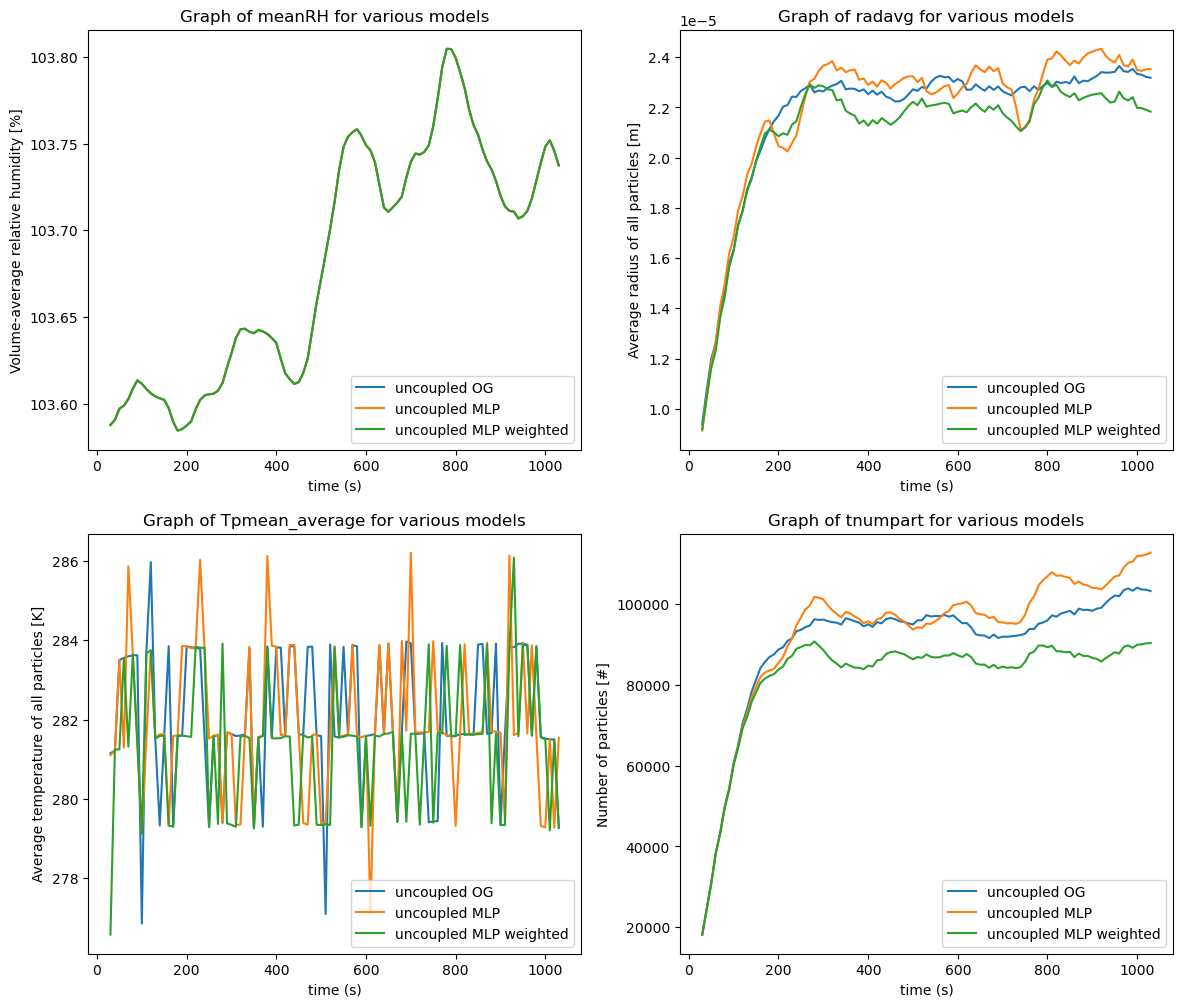

In [6]:
fig, axs = plt.subplots((len(history_variables)//2), 2)
fig.set_figheight(12)
fig.set_figwidth(14)
for i in range(1,len(history_variables)):
    index = [(i-1)//2, (i-1)%2]
    for j in range(history_file_count):
        axs[*index].plot(history_variables[0][j], history_variables[i][j])
    axs[*index].legend(history_names, loc="lower right")
    axs[*index].set_title("Graph of " + history_variable_names[i] + " for various models")
    axs[*index].set(xlabel=history_variable_labels[0], ylabel=history_variable_labels[i])

In [14]:
histogram_time_step = 4

histogram_variable_names = ["rad"]
histogram_variables = [[[file.variables[varname + "bins"][:],[file.variables[varname + "hist"][:]]] for file in histogram_files] for varname in histogram_variable_names]

NameError: name 'histogram_files' is not defined

In [21]:
print(histogram_variables[0][1][0])

[-7.99021526 -7.98043053 -7.97064579 -7.96086106 -7.95107632 -7.94129159
 -7.93150685 -7.92172211 -7.91193738 -7.90215264 -7.89236791 -7.88258317
 -7.87279843 -7.8630137  -7.85322896 -7.84344423 -7.83365949 -7.82387476
 -7.81409002 -7.80430528 -7.79452055 -7.78473581 -7.77495108 -7.76516634
 -7.7553816  -7.74559687 -7.73581213 -7.7260274  -7.71624266 -7.70645793
 -7.69667319 -7.68688845 -7.67710372 -7.66731898 -7.65753425 -7.64774951
 -7.63796477 -7.62818004 -7.6183953  -7.60861057 -7.59882583 -7.5890411
 -7.57925636 -7.56947162 -7.55968689 -7.54990215 -7.54011742 -7.53033268
 -7.52054795 -7.51076321 -7.50097847 -7.49119374 -7.481409   -7.47162427
 -7.46183953 -7.45205479 -7.44227006 -7.43248532 -7.42270059 -7.41291585
 -7.40313112 -7.39334638 -7.38356164 -7.37377691 -7.36399217 -7.35420744
 -7.3444227  -7.33463796 -7.32485323 -7.31506849 -7.30528376 -7.29549902
 -7.28571429 -7.27592955 -7.26614481 -7.25636008 -7.24657534 -7.23679061
 -7.22700587 -7.21722114 -7.2074364  -7.19765166 -7.

Histogram:  0
0.0
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- --

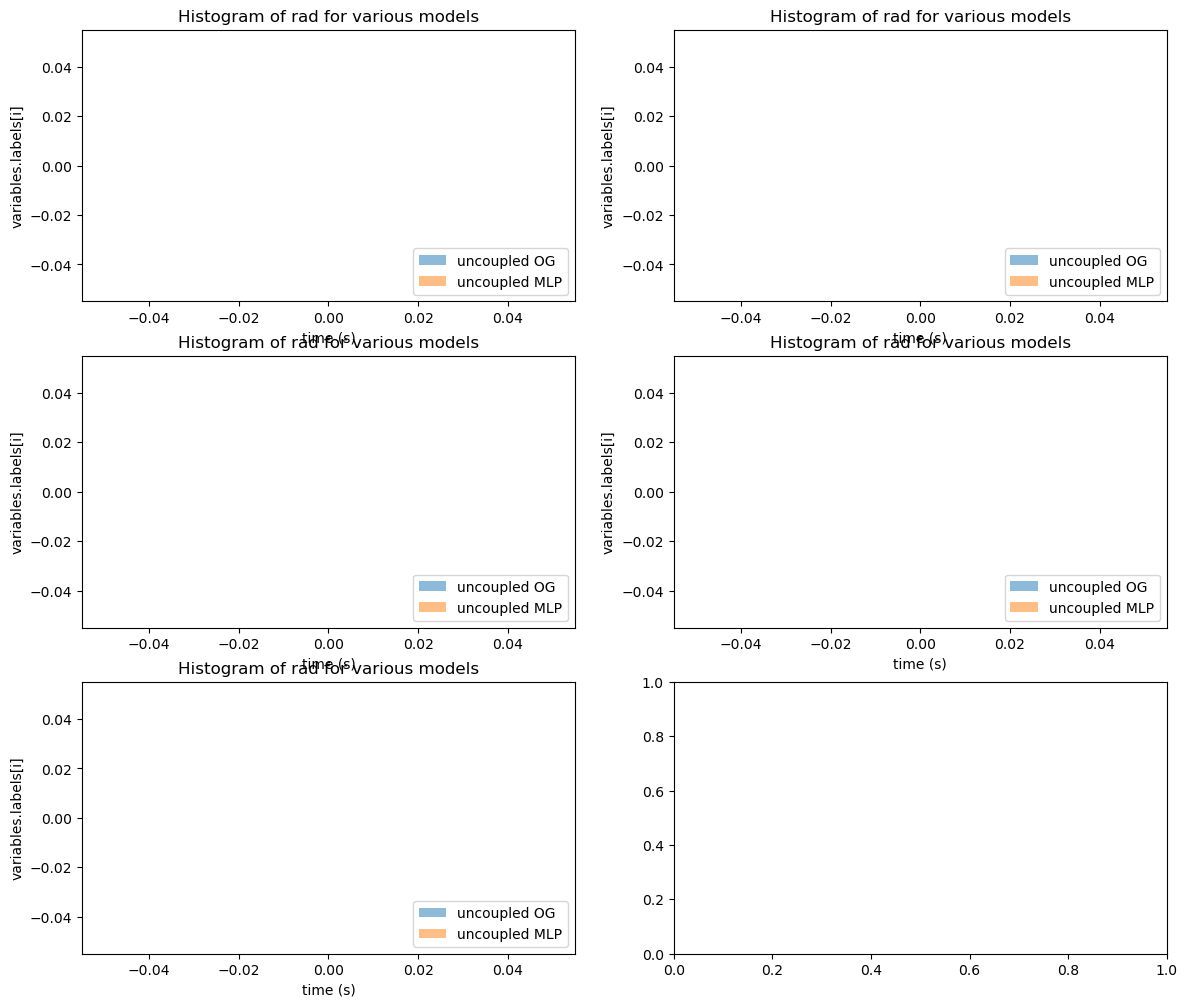

In [48]:
histogram_count = len(histogram_variables[0][1][1][0])//histogram_time_step
# NOTE may note have the same number of histograms - fix later. Probably take the min across all

fig, axs = plt.subplots(np.ceil(histogram_count/2.0).astype(int), 2)
fig.set_figheight(12)
fig.set_figwidth(14)
for i in range(histogram_count):
    print("Histogram: ", i)
    index = [i//2, i%2]
    for j in range(histogram_file_count):
        counts = histogram_variables[0][j][1][0][histogram_time_step*i]
        print(np.sum(counts))
        counts = counts / np.sum(counts)
        bins = histogram_variables[0][j][0]
        print(counts)

        axs[*index].hist(np.ones(len(counts)),bins=bins, weights=counts, alpha=0.5, density=True)
    axs[*index].legend(history_names, loc="lower right")
    axs[*index].set_title("Histogram of " + histogram_variable_names[0] + " for various models")
    axs[*index].set(xlabel="time (s)", ylabel="variables.labels[i]")